# **이변량분석 : 범주 vs 범주**

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


## **2.범주 --> 범주**

### **(1) 교차표(pd.crosstab)**

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [3]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [4]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [5]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [6]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'all')

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


### **(2) 시각화**
* mosaic
* (참조) 100% Stacked Bar


1) Pclass --> Survived

* mosaic plot
    * mosaic(dataframe, [ feature, target])

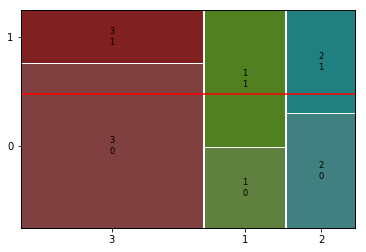

In [7]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


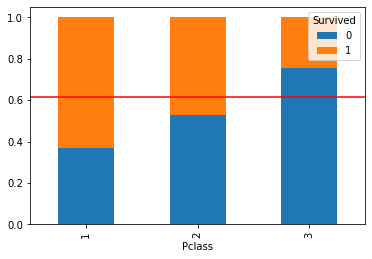

In [8]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

비율만 비교하므로 양에 대한 비교는 할 수 없다!

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

아래 관계에 대해서 교차표와 시각화(mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


* [문1] Sex --> Survived

In [12]:
pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


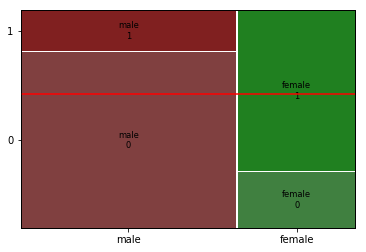

In [13]:
mosaic(titanic, [ 'Sex','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* [문2] Embarked --> Survived

In [15]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


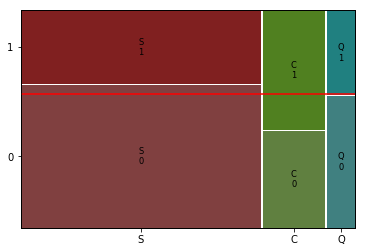

In [17]:
mosaic(titanic, ['Embarked', 'Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* [문3] Title --> Survived

In [18]:
pd.crosstab(titanic['Title'], titanic['Survived'], normalize='index')

Survived,0,1
Title,,
Master,0.439024,0.560976
Miss,0.297297,0.702703
Mr,0.839388,0.160612
Mrs,0.203125,0.796875
Others,0.785714,0.214286


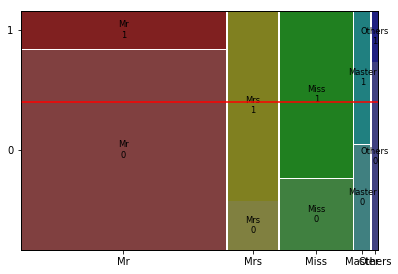

In [21]:
plt.rcParams["figure.figsize"]=(6.4, 4.4) #plt.figure와 다르게 파일 세션 전체에 영향을 미침 
mosaic(titanic, ['Title', 'Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

### **(3) 수치화 : 카이제곱검정**

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다. 

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [22]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [30]:
# 1) 먼저 교차표 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
result = spst.chi2_contingency(table)
print(f'x^2: {result[0]}')
print(f'p-value: {result[1]}')
print(f'fre: {result[2]}')
print(f'freq: {result[3]}')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------------------------------------
x^2: 102.88898875696056
p-value: 4.549251711298793e-23
fre: 2
freq: [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 수치화 해 봅시다.

* [문1] Sex --> Survived

In [31]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'])
print(table)
print('-'*50)
result = spst.chi2_contingency(table)
print(f'x^2: {result[0]}')
print(f'p-value: {result[1]}')
print(f'fre: {result[2]}')
print(f'freq: {result[3]}')

Survived    0    1
Sex               
female     81  233
male      468  109
--------------------------------------------------
x^2: 260.71702016732104
p-value: 1.1973570627755645e-58
fre: 1
freq: [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


* [문2] Embarked --> Survived

In [32]:
table = pd.crosstab(titanic['Embarked'], titanic['Survived'])
print(table)
print('-'*50)
result = spst.chi2_contingency(table)
print(f'x^2: {result[0]}')
print(f'p-value: {result[1]}')
print(f'fre: {result[2]}')
print(f'freq: {result[3]}')

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219
--------------------------------------------------
x^2: 25.964452881874784
p-value: 2.3008626481449577e-06
fre: 2
freq: [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


* [문3] Title --> Survived

In [33]:
table = pd.crosstab(titanic['Title'], titanic['Survived'])
print(table)
print('-'*50)
result = spst.chi2_contingency(table)
print(f'x^2: {result[0]}')
print(f'p-value: {result[1]}')
print(f'fre: {result[2]}')
print(f'freq: {result[3]}')

Survived    0    1
Title             
Master     18   23
Miss       55  130
Mr        439   84
Mrs        26  102
Others     11    3
--------------------------------------------------
x^2: 289.1953165452417
p-value: 2.318405007221846e-61
fre: 4
freq: [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
